In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Experiment.create_prepared_data_tsfresh import *
from Experiment.compression import calculateCompRatio, compress_dataset
from utils.personal_utils import *


import matplotlib.pyplot as plt


In [2]:
all_ds = {
    'AppliancesEnergy':   '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TRAIN.ts',
    'NewsTitleSentiment': '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TRAIN.ts',
    'BenzeneConcentration':'/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TRAIN.ts',
    'BeijingPM25Quality': '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TRAIN.ts',

    'IEEEPPG':            '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TRAIN.ts',
    'FloodModeling1':     '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TRAIN.ts',
    'HouseholdPowerConsumption1': '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TRAIN.ts',
    'Covid3Month':              '/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TRAIN.ts'
}


#path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/'
#graph_title = 'Flaml'

path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets_agluon/'
graph_title = 'Agluon'

# Ordered to look less caotic

ds_names = [
    'BenzeneConcentration',
    'BeijingPM25Quality',
    'FloodModeling1',
    'BeijingPM10Quality',
    'HouseholdPowerConsumption1',
    'IEEEPPG',
    'Covid3Month',
    
    #'NewsTitleSentiment',
    'AppliancesEnergy',

]

dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]
tqs = ['dct', 'dft', 'dwt']


In [3]:
# Small test to make sure flaml and agluon have different values!
agluon = np.load('/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets_agluon/AppliancesEnergy/0.5_dct_AppliancesEnergy_predictions.npy')
print(agluon)
flaml = np.load('/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/AppliancesEnergy/0.5_dct_AppliancesEnergy_predictions.npy')
print(flaml)

y = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/AppliancesEnergy_y_TEST.npy')
print(y)
print(get_rmse(y, agluon))
print(get_rmse(y,flaml))

[17.442472  17.432556  11.603359  12.300308  14.701003  14.515587
 18.895105  14.393378  15.23559   13.836257  18.953289  12.72488
 12.329084  12.590972  11.662863  18.235662  12.863882  13.7431345
 11.050593  11.813956  11.604644  16.43463   12.348066  12.592584
 13.605748  13.601838  12.626034  15.167796  11.842786  13.928978
 19.40772   15.202946  12.36191   14.55629   12.358824  16.205042
 11.433288  11.393486  17.227528  12.238573  11.747438  12.39569  ]
[16.69445931 17.19507278 10.97566553  9.63839211 16.39740071 16.05907431
 18.51846699 17.91561374 15.47908822 16.50753442 21.28179005 14.69219297
 12.28593523 12.87904754 11.47317312 17.84259389 14.29087285 13.64713947
 12.3643745  11.98552642  9.55028513 19.58386562 13.38718348 14.37486911
 16.03795444 16.10018412 13.0828798  14.55655662 11.6495969  15.52480686
 19.0197845  14.85165313 13.79243931 16.54981703 13.87616443 15.94919334
  9.57982451 12.58882044 16.35929165 10.97443751 12.33519704 10.82685094]
[17.37 20.65 11.42 10.68

Text(0.5, 0.98, 'Agluon')

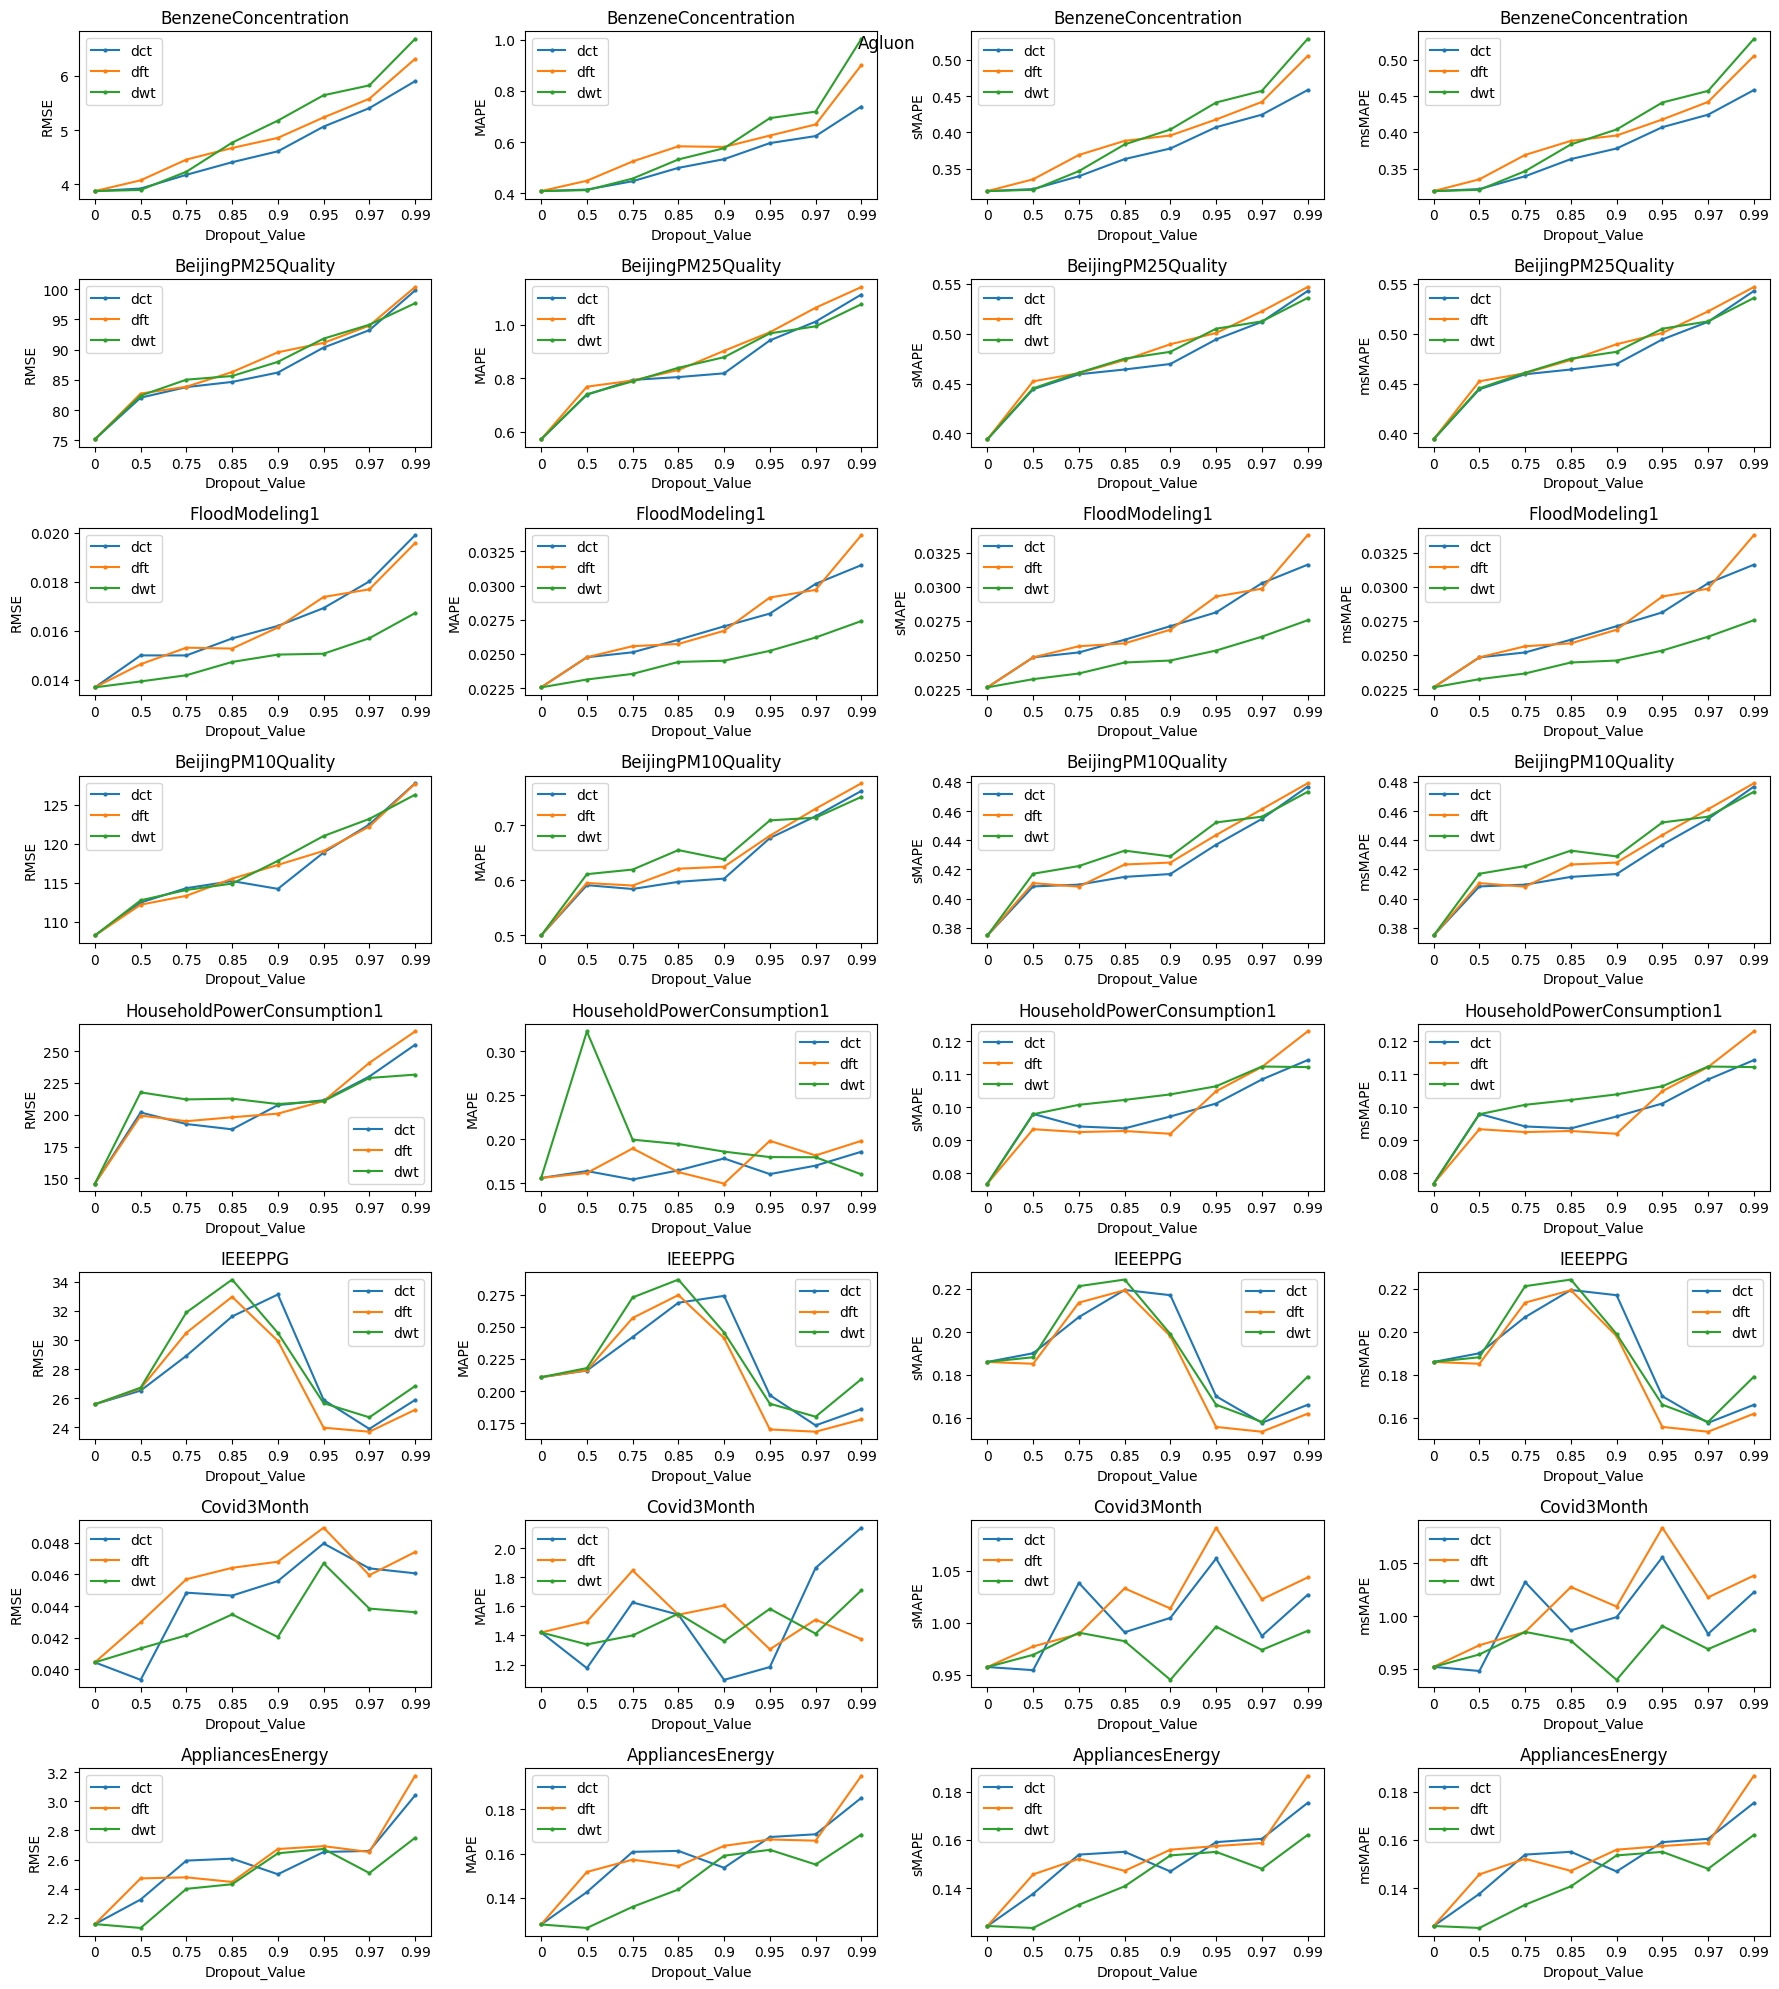

In [22]:
# Plot Dropout_Value against the metrics


""" ds_names = [
    'AppliancesEnergy',
    'AppliancesEnergy',
    'BenzeneConcentration',
    'BeijingPM25Quality',
] """

""" ds_names = [
    'IEEEPPG',
    'FloodModeling1',
    'HouseholdPowerConsumption1',
    'Covid3Month'
] """



custom_x_ticks = np.arange(len(dropout_values))
plt.figure(figsize=(18, 20))  

num_dataset = len(ds_names)

for subplot_id, ds_name in enumerate(ds_names):

    #dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + 'TEST.npy')
    y = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/{ds_name}_y_TEST.npy')


    for tq in tqs:
        comp_ratios = np.empty_like(dropout_values)
        rmse = np.empty_like(dropout_values)
        mape = np.empty_like(dropout_values)
        smape = np.empty_like(dropout_values)
        msmape = np.empty_like(dropout_values)


        for i, dropout in enumerate(dropout_values):
            if dropout == 0:
                prediction =  np.load(path + ds_name + '/' + f"NONE_{ds_name}_predictions.npy")

            else:
                prediction = np.load(path + ds_name + '/' + f"{dropout}_{tq}_{ds_name}_predictions.npy")
            rmse[i] = get_rmse(y, prediction)
            mape[i] = get_mape(y, prediction)
            smape[i] = get_smape(y, prediction)
            msmape[i] = get_msmape(y, prediction)

                #comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))
                


        # comp_ratios = np.arange(len(dropout_values))


        num_metrics = 4


        plt.subplot(num_dataset,4,subplot_id * num_metrics + 1)
        plt.plot(custom_x_ticks, rmse, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("RMSE")
        plt.legend()
        plt.title(f'{ds_name}')
        plt.xticks(custom_x_ticks, dropout_values)

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 2)
        plt.plot(custom_x_ticks, mape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("MAPE")
        plt.legend()
        plt.title(f'{ds_name}')
        plt.xticks(custom_x_ticks, dropout_values)

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 3)
        plt.plot(custom_x_ticks, smape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("sMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')               
        plt.xticks(custom_x_ticks, dropout_values)


        plt.subplot(num_dataset,4,subplot_id * num_metrics + 4)
        plt.plot(custom_x_ticks, msmape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("msMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')   
        plt.xticks(custom_x_ticks, dropout_values)

plt.tight_layout()
plt.suptitle(graph_title)

WARNING:
- In Create pareto_values dict and in plotting it we use the pre-saved comp_ratio values for our pre_defined/usual dropout_values. 

-> IF I CHANGE THE COMPRESSION CODE OR PARTS OF CREATING_AND_PREPARE_DATA, I PROBABLY HAVE TO RELOAD THE RMSE VALUES

Text(0.5, 0.98, 'Agluon')

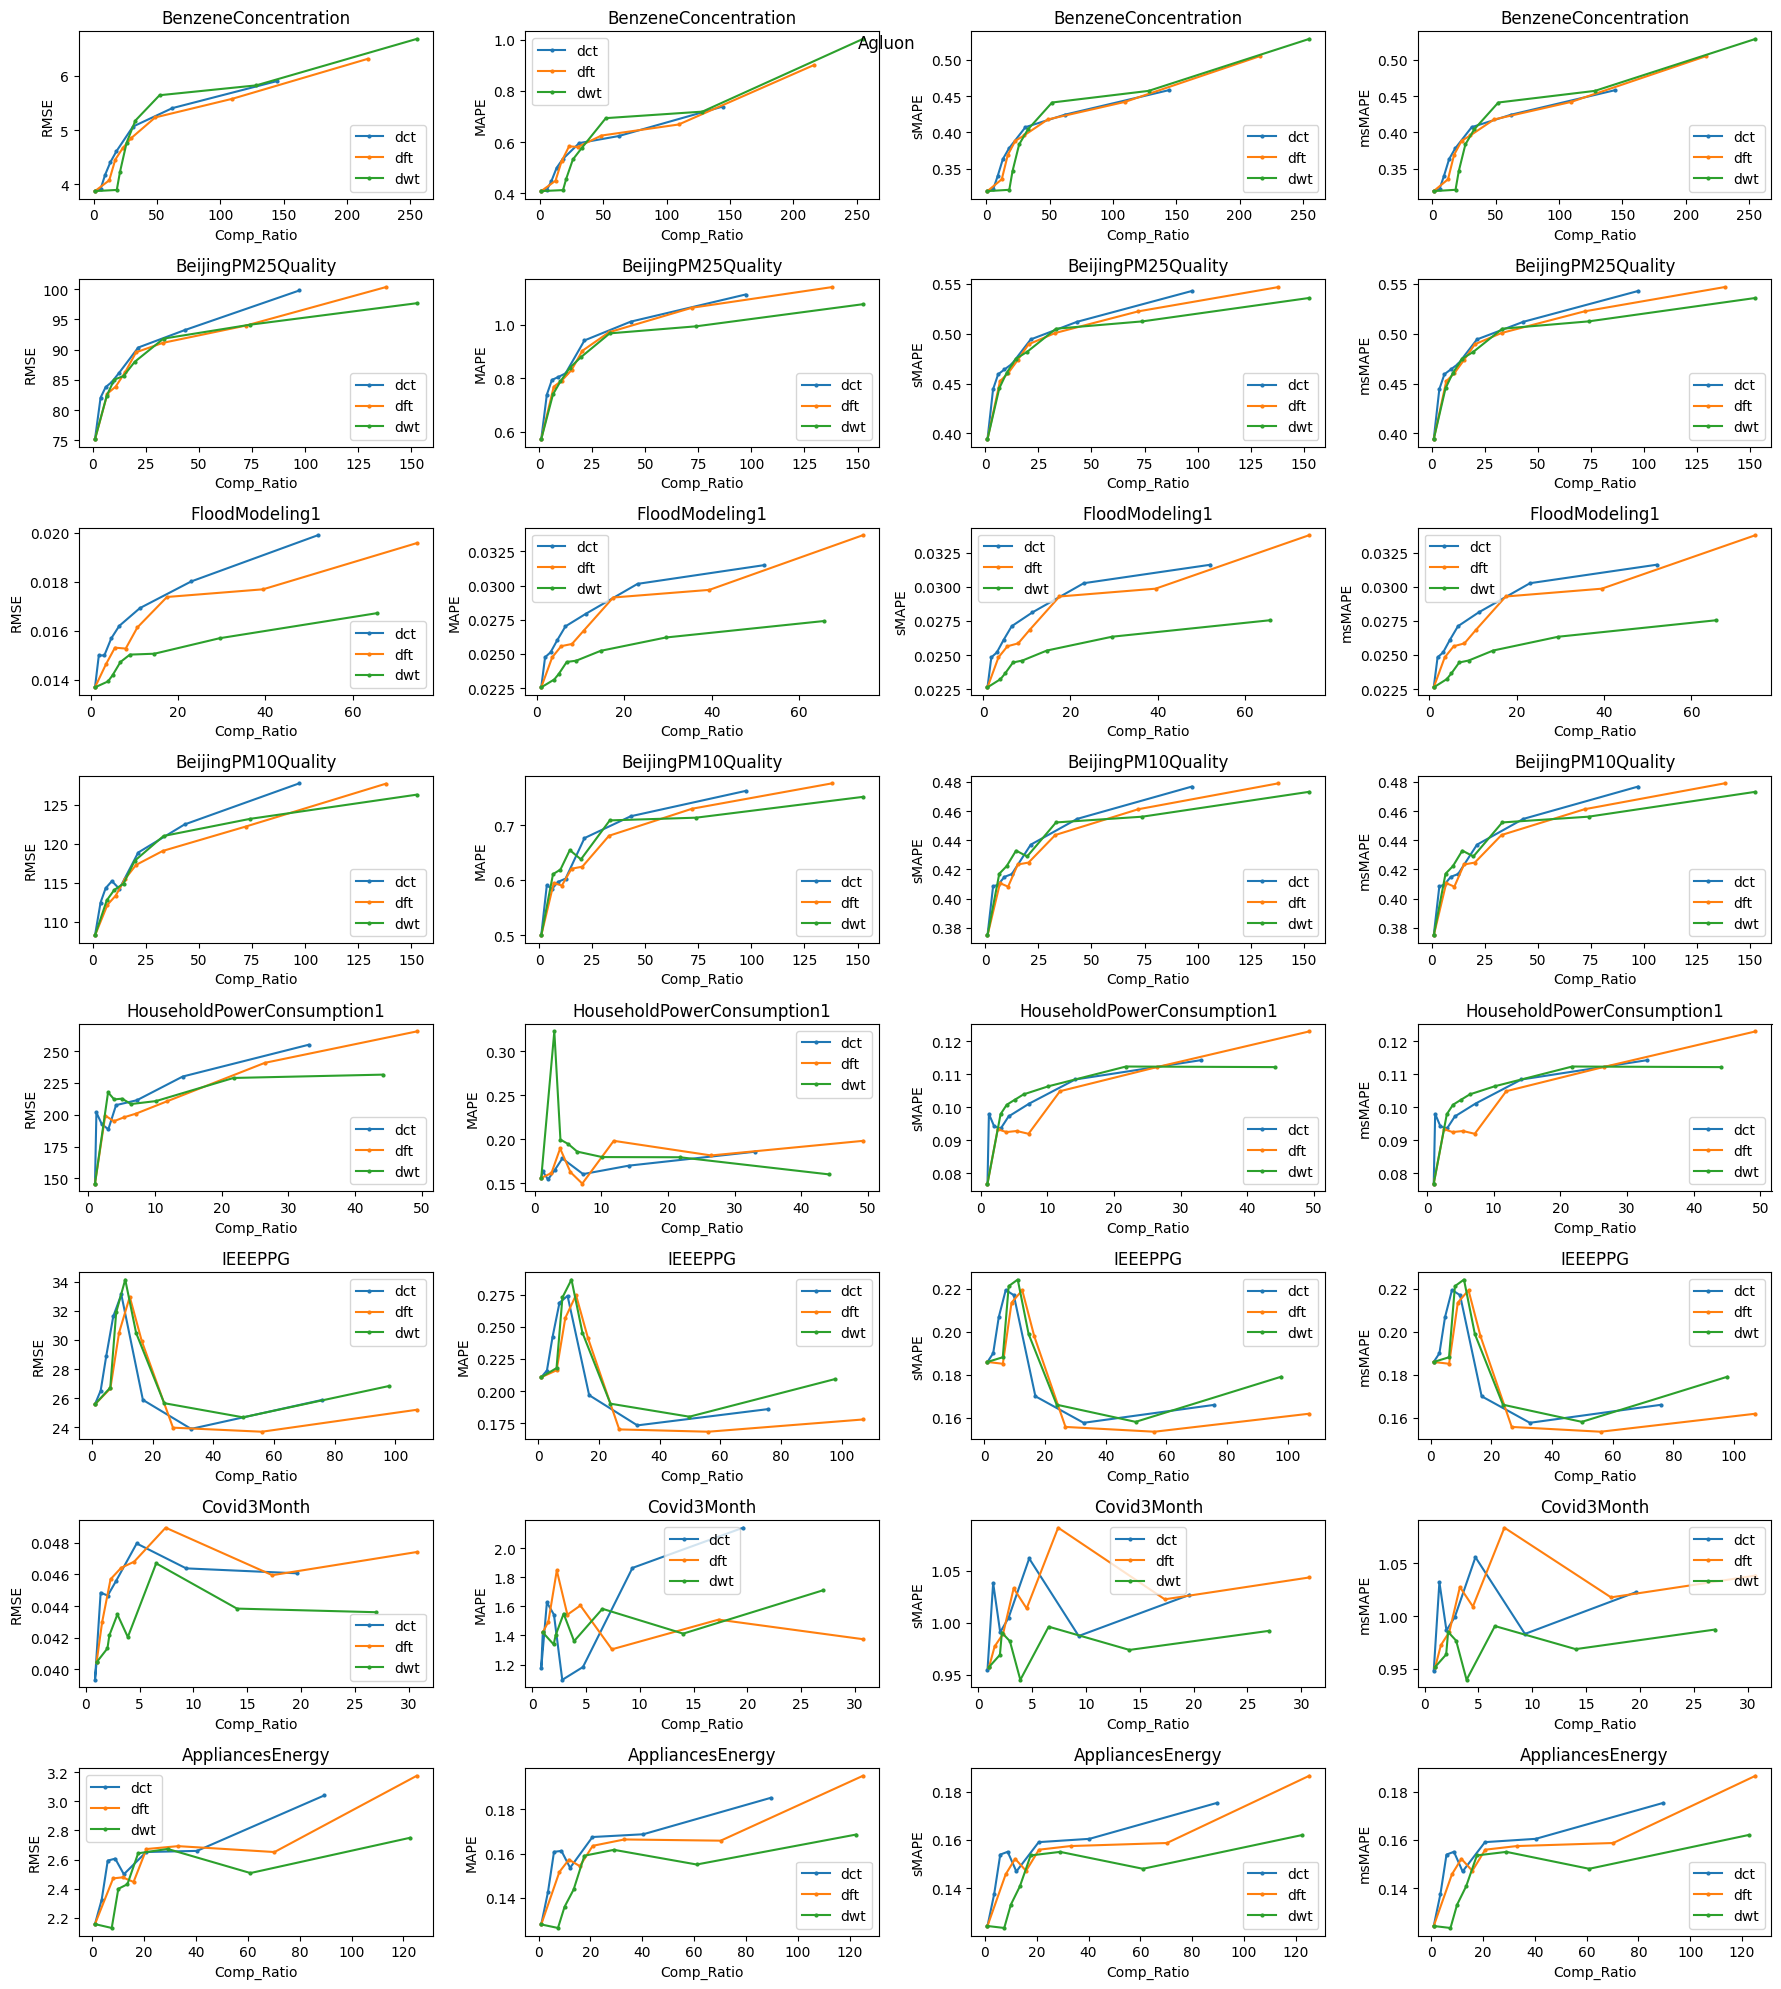

In [23]:
# Plot Comp_Ratio against the metric #> 6mins

""" ds_names = [
            'FloodModeling1', 
            'BenzeneConcentration',
            'HouseholdPowerConsumption1',
            'IEEEPPG',
            ] """



plt.figure(figsize=(18, 20))  

num_dataset = len(ds_names)

for subplot_id, ds_name in enumerate(ds_names):

    #dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + '_TRAIN.npy')
    y = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/{ds_name}_y_TEST.npy')


    for tq in tqs:
        comp_ratios = np.empty_like(dropout_values)
        rmse = np.empty_like(dropout_values)
        mape = np.empty_like(dropout_values)
        smape = np.empty_like(dropout_values)
        msmape = np.empty_like(dropout_values)


        for i, dropout in enumerate(dropout_values):
            if dropout == 0:
                prediction =  np.load(path + ds_name + '/' + f"NONE_{ds_name}_predictions.npy")
                #comp_ratios[i] = 1 # No Compression, so Comp-Ratio of 1 # Activate both to not use pre-saved comp_ratios

            else:
                prediction = np.load(path + ds_name + '/' + f"{dropout}_{tq}_{ds_name}_predictions.npy")
                
            rmse[i] = get_rmse(y, prediction)
            mape[i] = get_mape(y, prediction)
            smape[i] = get_smape(y, prediction)
            msmape[i] = get_msmape(y, prediction)


            # This is the time consuming step!
            #if dropout != 0:
            #    comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))


        comp_ratios = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Comp_Ratios/' + f'{ds_name}_{tq}_TEST.npy')

            
        num_metrics = 4



        plt.subplot(num_dataset,4,subplot_id * num_metrics + 1)
        plt.plot(comp_ratios, rmse, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("RMSE")
        plt.legend()
        plt.title(f'{ds_name}')

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 2)
        plt.plot(comp_ratios, mape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("MAPE")
        plt.legend()
        plt.title(f'{ds_name}')

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 3)
        plt.plot(comp_ratios, smape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("sMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')               



        plt.subplot(num_dataset,4,subplot_id * num_metrics + 4)
        plt.plot(comp_ratios, msmape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("msMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')   
        


plt.tight_layout()
# Add main title for the entire figure
plt.suptitle(graph_title)